In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
# Load the dataset
data = pd.read_csv('Dataset (ATS)-1.csv')

# Display the first few rows of the dataset
print(data.head())

   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      34          Yes            No   
2    Male              0         No       2          Yes            No   
3    Male              0         No      45           No            No   
4  Female              0         No       2          Yes            No   

  InternetService        Contract  MonthlyCharges Churn  
0             DSL  Month-to-month           29.85    No  
1             DSL        One year           56.95    No  
2             DSL  Month-to-month           53.85   Yes  
3             DSL        One year           42.30    No  
4     Fiber optic  Month-to-month           70.70   Yes  


In [171]:
# Convert MonthlyCharges to numeric and handle missing values
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['MonthlyCharges'] = data['MonthlyCharges'].fillna(0)


In [172]:
# Preprocess column names and string values
df = data.copy()
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

print(df.head())


   gender  seniorcitizen dependents  tenure phoneservice multiplelines  \
0  female              0         no       1           no            no   
1    male              0         no      34          yes            no   
2    male              0         no       2          yes            no   
3    male              0         no      45           no            no   
4  female              0         no       2          yes            no   

  internetservice        contract  monthlycharges churn  
0             dsl  month-to-month           29.85    no  
1             dsl        one_year           56.95    no  
2             dsl  month-to-month           53.85   yes  
3             dsl        one_year           42.30    no  
4     fiber_optic  month-to-month           70.70   yes  


In [173]:
# Check for missing values
df_train_full.isnull().sum()

gender             0
seniorcitizen      0
dependents         0
tenure             0
phoneservice       0
multiplelines      0
internetservice    0
contract           0
monthlycharges     0
churn              0
dtype: int64

In [174]:
# Save the preprocessed dataset to a separate file
df.to_csv('preprocessed_data.csv', index=False)

In [175]:
# Split the dataset
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.churn.values
y_val = df_val.churn.values
del df_train['churn']
del df_val['churn']

In [176]:
# Save the datasets to separate files
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

In [177]:
# Show the size and composition of training, validation, and testing datasets
print(f"Training dataset size: {df_train.shape}")
print(f"Testing dataset size: {df_test.shape}")

print("\nTraining dataset composition:")
print(df_train.head())

print("\nTesting dataset composition:")
print(df_test.head())

Training dataset size: (3774, 9)
Testing dataset size: (1409, 10)

Training dataset composition:
      gender  seniorcitizen dependents  tenure phoneservice multiplelines  \
2935    male              0         no      71          yes            no   
3639  female              1         no      60          yes           yes   
2356    male              0         no      46          yes            no   
6660    male              0         no       1          yes            no   
755     male              1         no      20          yes           yes   

     internetservice        contract  monthlycharges  
2935             dsl        two_year           86.10  
3639     fiber_optic        one_year          100.50  
2356             dsl  month-to-month           45.20  
6660     fiber_optic  month-to-month           69.15  
755      fiber_optic  month-to-month           98.55  

Testing dataset composition:
      gender  seniorcitizen dependents  tenure phoneservice multiplelines  \
338

In [178]:
# Define categorical and numerical features
categorical = ['gender', 'seniorcitizen', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'contract']
numerical = ['tenure', 'monthlycharges']

In [179]:
# Convert data to dictionary format
train_dict = df_train[categorical + numerical].to_dict(orient='records')


In [180]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

print(X_train.shape)
print(dv.get_feature_names_out())

(3774, 16)
['contract=month-to-month' 'contract=one_year' 'contract=two_year'
 'dependents=no' 'dependents=yes' 'gender=female' 'gender=male'
 'internetservice=dsl' 'internetservice=fiber_optic' 'monthlycharges'
 'multiplelines=no' 'multiplelines=yes' 'phoneservice=no'
 'phoneservice=yes' 'seniorcitizen' 'tenure']


In [181]:
# Apply scaling to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

/Users/burairraza123/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/burairraza123/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/burairraza123/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/burairraza123/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

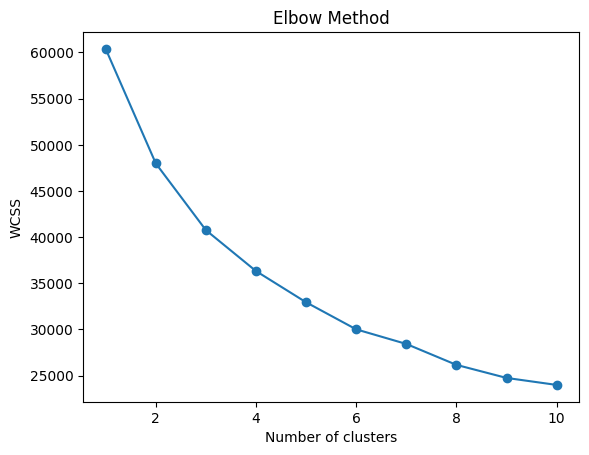

In [182]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss, "-o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [183]:
# Train the K-Means clustering model with the optimal number of clusters
kmeans = KMeans(4)
kmeans.fit(X_train_scaled)

clusters = kmeans.predict(X_train_scaled)

/Users/burairraza123/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


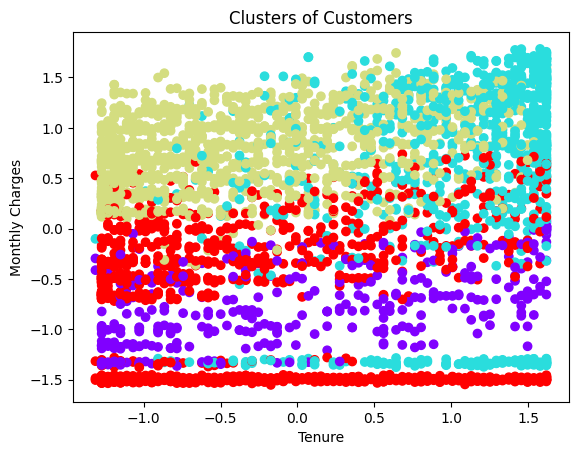

In [184]:
# Choose two features for visualization
feature1 = dv.get_feature_names_out().tolist().index('tenure')
feature2 = dv.get_feature_names_out().tolist().index('monthlycharges')

# Visualize the clusters (using the selected features)
plt.scatter(X_train_scaled[:, feature1], X_train_scaled[:, feature2], c=train_clusters, cmap='rainbow')
plt.title('Clusters of Customers')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()